In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Audiobooks_data.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [4]:
df_input=df.iloc[:,1:11]

In [5]:
df_input.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [6]:
df_input.head(5)

,1,2,3,4,5,6,7,8,9,10
0,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92
1,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0
2,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388
3,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129
4,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361


In [7]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0
14083,251,1674.0,3348,5.33,10.67,0,8.91,0.00,0.0,0,0,1


In [8]:
df_target=df.iloc[:,[11]]

In [9]:
df_target.head()

,11
0,0
1,0
2,0
3,0
4,0


In [10]:
sum(df_target[11]==0), sum(df_target[11]==1)

(11847, 2237)

### We have imbalanced data set

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
smote = SMOTE(random_state=42)

In [13]:
input_data_balanced, target_data_balanced=smote.fit_resample(df_input,df_target)

In [14]:
# input_data_balanced
target_data_balanced

,11
0,0
1,0
2,0
3,0
4,0
...,...
23689,1
23690,1
23691,1
23692,1


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(input_data_balanced, target_data_balanced, test_size=0.3, random_state=42)

In [50]:
scaler=MinMaxScaler()

In [51]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [52]:
X_test_scaled.shape,X_train_scaled.shape,y_test.shape,y_train.shape

((7109, 10), (16585, 10), (7109, 1), (16585, 1))

In [53]:
X_train_scaled.shape[1]

10

In [54]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop=EarlyStopping(monitor='val_loss',patience=4)

In [56]:
model=Sequential()

In [57]:
model.add(Dense(10,input_shape=(X_train_scaled.shape[1],),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=100,shuffle=True,epochs=50,callbacks=[early_stop]) #validation_split=0.0

Epoch 1/50
166/166 [==============================] - 1s 3ms/step - loss: 0.5843 - accuracy: 0.6897 - val_loss: 0.4746 - val_accuracy: 0.7400
Epoch 2/50
166/166 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.7583 - val_loss: 0.4484 - val_accuracy: 0.7122
Epoch 3/50
166/166 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.7680 - val_loss: 0.3953 - val_accuracy: 0.7891
Epoch 4/50
166/166 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.7720 - val_loss: 0.3886 - val_accuracy: 0.7876
Epoch 5/50
166/166 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.7698 - val_loss: 0.3884 - val_accuracy: 0.7751
Epoch 6/50
166/166 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.7815 - val_loss: 0.3762 - val_accuracy: 0.8059
Epoch 7/50
166/166 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.7701 - val_loss: 0.3768 - val_accuracy: 0.7958
Epoch 

In [59]:
df_loss=pd.DataFrame(model.history.history)

In [60]:
df_loss.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

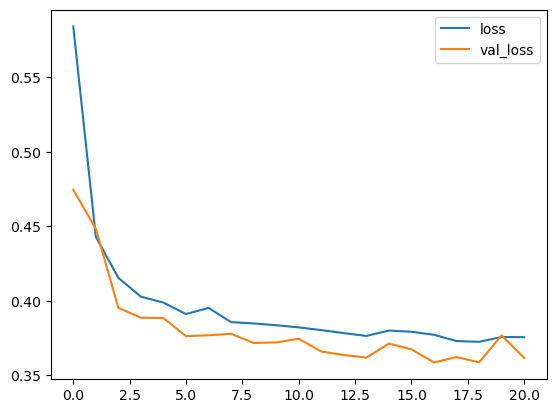

In [61]:
df_loss[['loss','val_loss']].plot()

<Axes: >

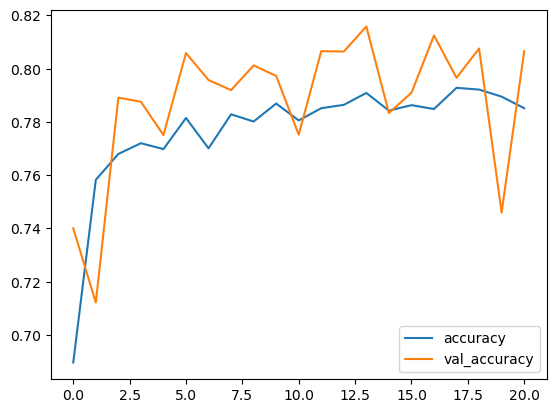

In [62]:
df_loss[['accuracy','val_accuracy']].plot()

In [63]:
test_loss,test_accuracy=model.evaluate(X_test_scaled,y_test)

223/223 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8066


In [64]:
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 80.66%


In [65]:
y_pred_prob=model.predict(X_test_scaled)

223/223 [==============================] - 0s 1ms/step


In [69]:
y_pred=(y_pred_prob>0.5).astype(int)  ##binry clasification

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      3578
           1       0.89      0.70      0.78      3531

    accuracy                           0.81      7109
   macro avg       0.82      0.81      0.80      7109
weighted avg       0.82      0.81      0.80      7109



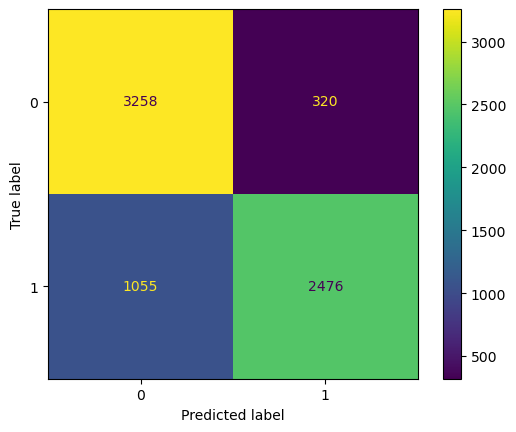

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [97]:
df_pred=pd.DataFrame(y_test[11].values,columns=['True'])

In [98]:
df_pred

,True
0,1
1,0
2,0
3,1
4,0
...,...
7104,0
7105,1
7106,0
7107,0


In [96]:
y_test[11].values

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [99]:
df_pred['Predict']=y_pred

In [102]:
df_pred[df_pred['True']==df_pred['Predict']]

,True,Predict
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
7103,1,1
7104,0,0
7105,1,1
7106,0,0


In [104]:
len(df_pred), len(df_pred[df_pred['True']==df_pred['Predict']])

(7109, 5734)